In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [3]:
# 1. Reading data from CSV
def read_csv(file_path):
    """
    Read data from a CSV file and return a pandas DataFrame.

    Parameters:
    - file_path: str, the path to the CSV file.

    Returns:
    - pd.DataFrame, the loaded DataFrame.
    """
    return pd.read_csv(file_path)
#2. Getting information and statistics about over dataset
def dataset_info_statistics(data):
    """
    Display information and basic statistics about the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - None
    """
    # Display general information about the dataset
    print("Dataset Information:")
    print(data.info())
    print("\n")

    # Display basic statistics for numerical columns
    print("Basic Statistics for Numerical Columns:")
    print(data.describe())
    print("\n")

#3.check for the null values in the dataset
def check_null(data):
    """
    Check for null values in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - pd.Series, the count of null values for each column.
    """
    null_counts = data.isnull().sum()
    print("Null Values in the Dataset:")
    return null_counts

#4.check for duplicated rows in the dataset
def check_duplicates(data):
    """
    Check for duplicated rows in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - bool, True if any duplicated rows exist, False otherwise.
    """
    return data.duplicated().any()

#5. getting basic analysis for numerical and categorical columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot graphs for numerical and categorical data in a dataframe
def plot_graph(data):
    """
    Plot graphs for numerical and categorical data in a dataframe.
    
    Parameters:
    - data: Pandas DataFrame, input data.
    
    Returns:
    - None
    """
    # Get numerical columns
    numerical_columns = data.select_dtypes(include=np.number).columns
    
    # Plot histograms for numerical columns
    for column in numerical_columns:
        plt.figure(figsize=(5, 3))
        sns.histplot(data[column], kde=True)  # Updated to use sns.histplot
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    # Get categorical columns
    categorical_columns = data.select_dtypes(include='object').columns
    
    # Plot countplots for categorical columns
    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(data[column])
        plt.title(f'Countplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
#6. Seperate feature and target
def seperate_features_target(data,target_column):
    """
    Separate features and target variable
    
    Parameters: 
    - data: pandas DataFrame, input data.
    - target_column: str, the column representing the target varible.
    
    Returns:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    
    """
    
    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]
    
    return X,y
#7. Train test split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    """
    Perform train-test split on the dataset.

    Parameters:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    - test_size: float, optional, the proportion of the dataset to include in the test split (default is 0.2).
    - random_state: int or None, optional, seed for random number generation (default is None).

    Returns:
    - X_train: pandas DataFrame, features for training.
    - X_test: pandas DataFrame, features for testing.
    - y_train: pandas Series, target variable for training.
    - y_test: pandas Series, target variable for testing.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [4]:
calories = read_csv('calories.csv')
exercise = read_csv('exercise.csv')

In [5]:
data = pd.merge(calories, exercise, on='User_ID')

In [6]:
data.head()

User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0  14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1  14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2  11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3  16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4  17771927      35.0  female   27   154.0    58.0      10.0        81.0   

   Body_Temp  
0       40.8  
1       40.3  
2       38.7  
3       40.5  
4       39.8

In [7]:
dataset_info_statistics(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


Basic Statistics for Numerical Columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [8]:
check_null(data)

Null Values in the Dataset:


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

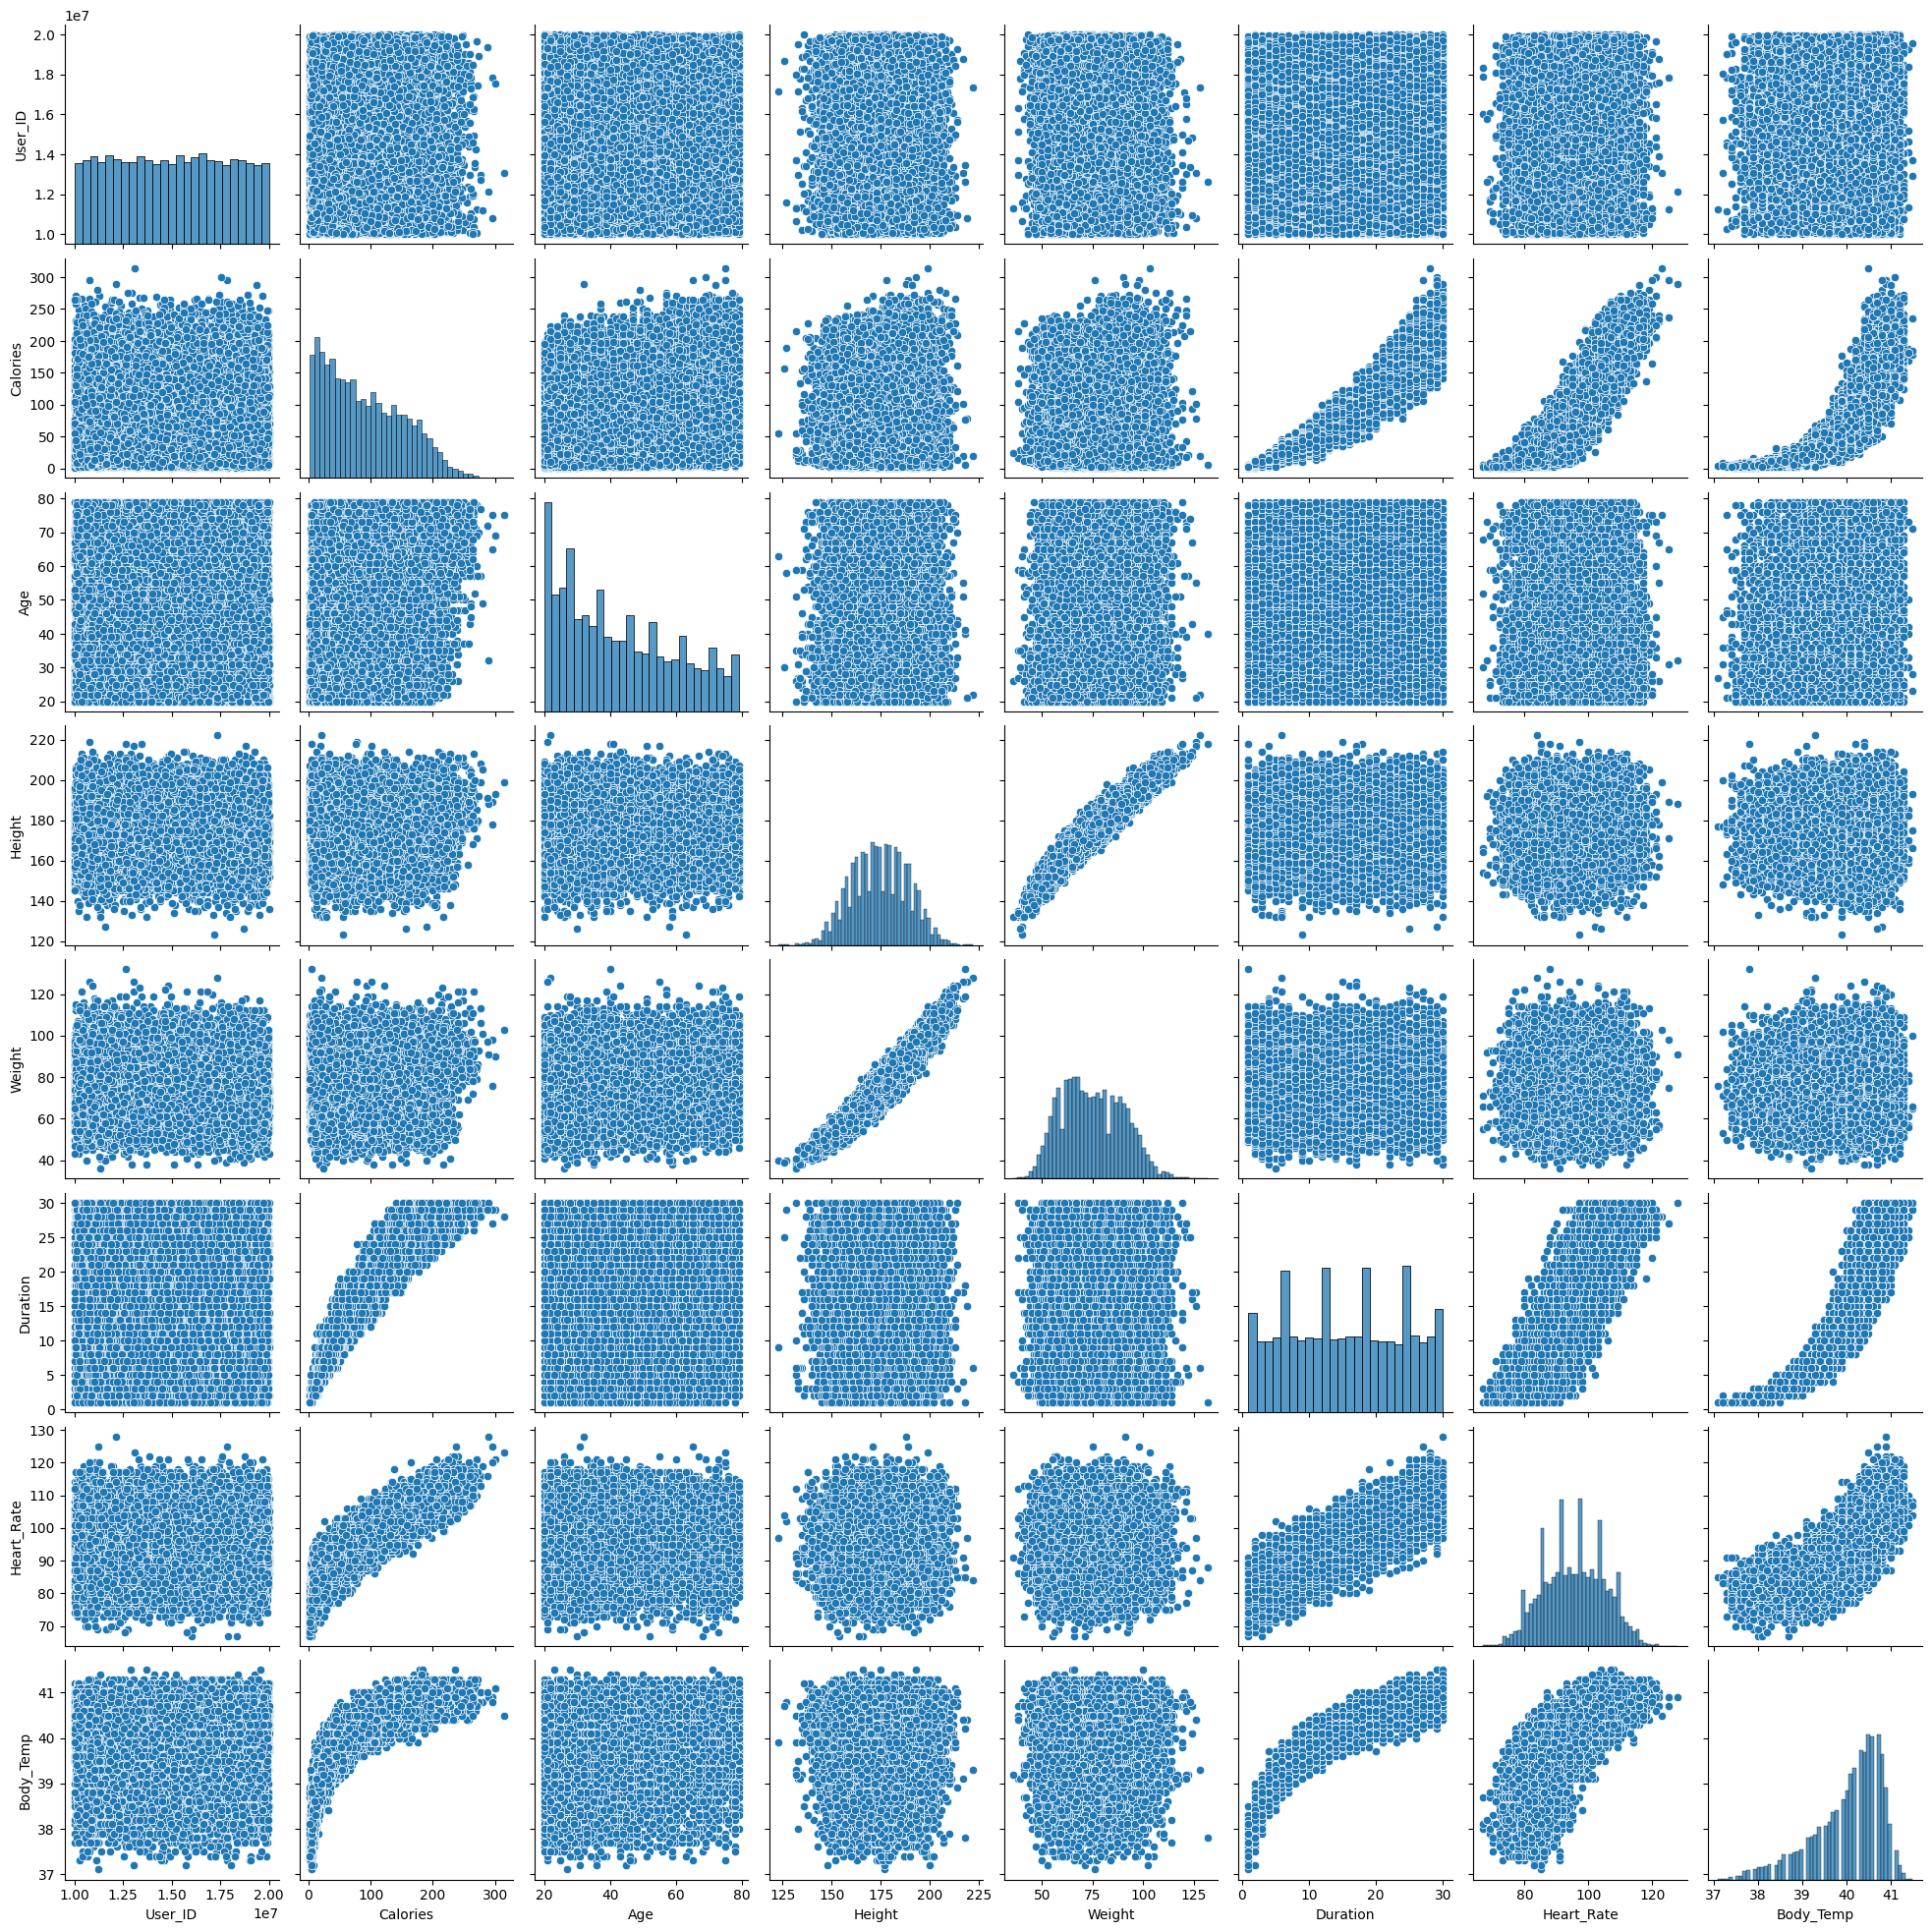

In [9]:
sns.pairplot(data)   
plt.show()

Text(0.5, 0, 'Duration')

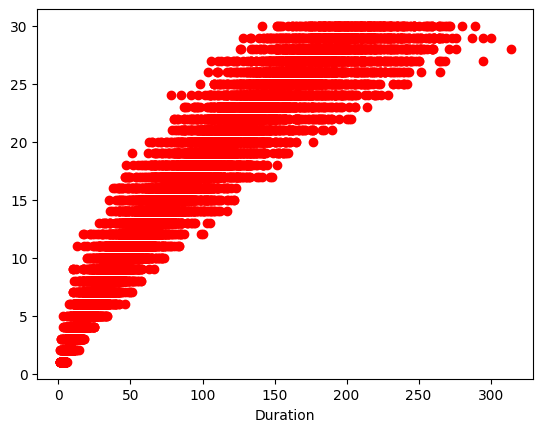

In [10]:
#visualize data points more closely 
plt.scatter(data['Calories'], data['Duration'],color='r')
plt.xlabel("Calories")
plt.xlabel("Duration")

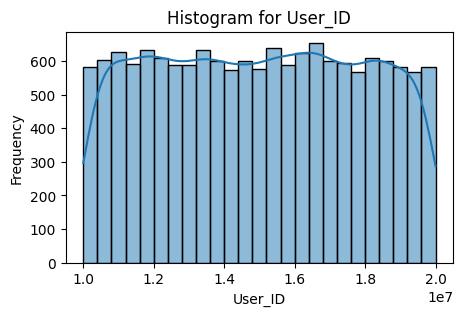

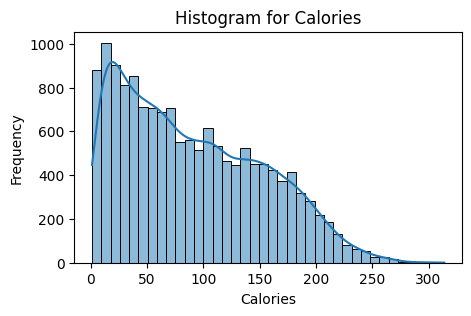

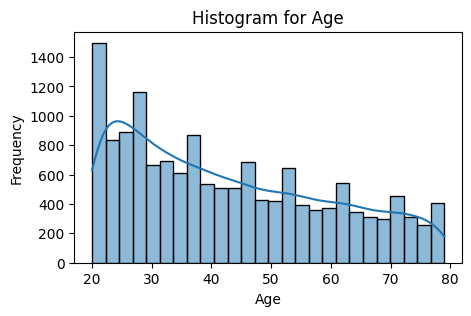

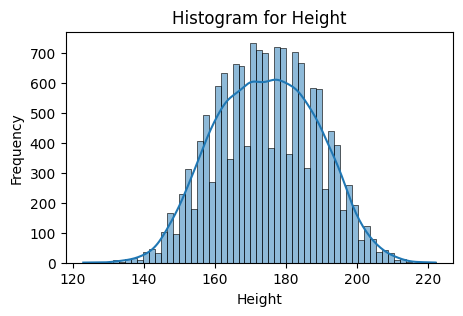

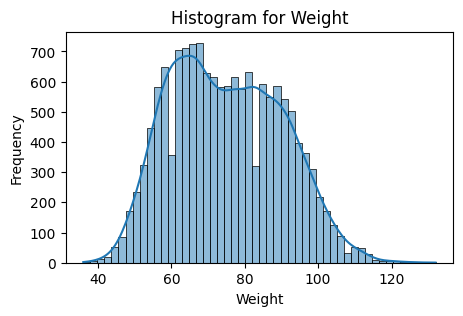

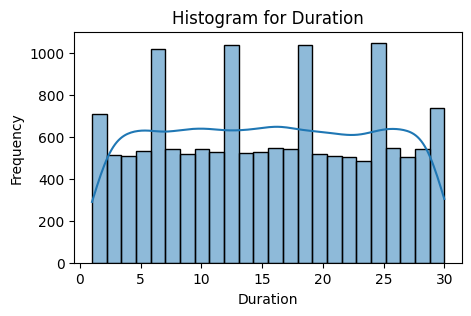

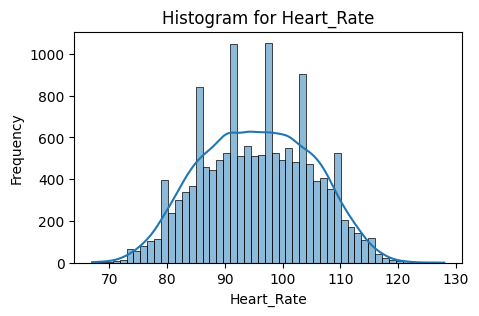

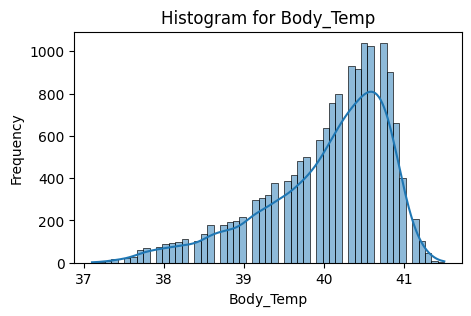

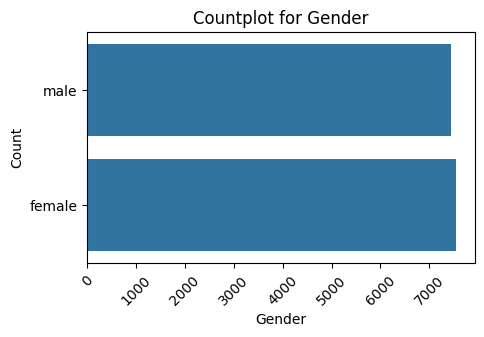

In [11]:
plot_graph(data)

In [12]:
"""
Box Plot : To visualize the distribution of data through their quartiles, highlighting outliers.
"""
def plot_box(data):
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data.select_dtypes(include=np.number))
    plt.title('Box Plot for Numerical Columns')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

In [13]:
print(data.columns)

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


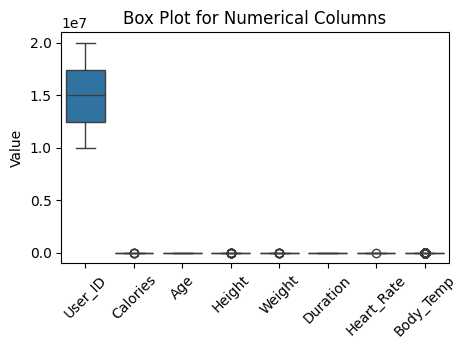

In [14]:
plot_box(data)

In [15]:
def plot_heatmap(data):
    """
    Plot a heatmap to visualize the correlation between numerical columns in the dataset.
    
    Parameters:
    - data: Pandas DataFrame containing the dataset.
    
    Returns:
    - None: Displays the correlation heatmap.
    """
    plt.figure(figsize=(10, 8))
    # Calculate the correlation matrix only for numeric columns
    correlation_matrix = data.select_dtypes(include=np.number).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()


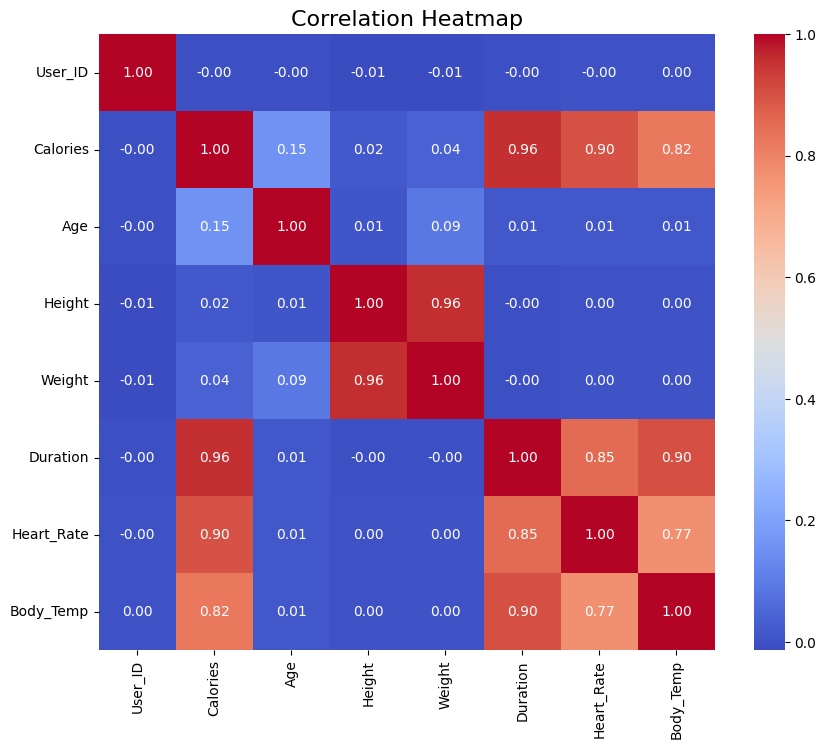

In [16]:
plot_heatmap(data)

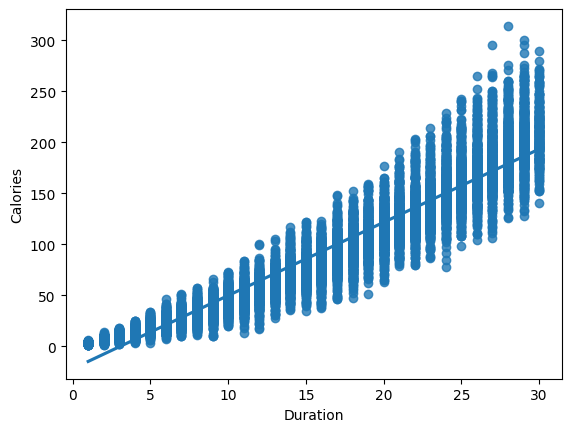

In [17]:
sns.regplot(x=data['Duration'], y=data['Calories'])
plt.show()

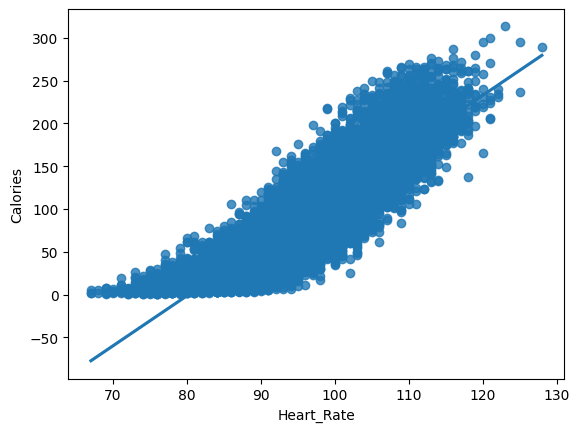

In [18]:
sns.regplot(x=data['Heart_Rate'], y=data['Calories'])
plt.show()

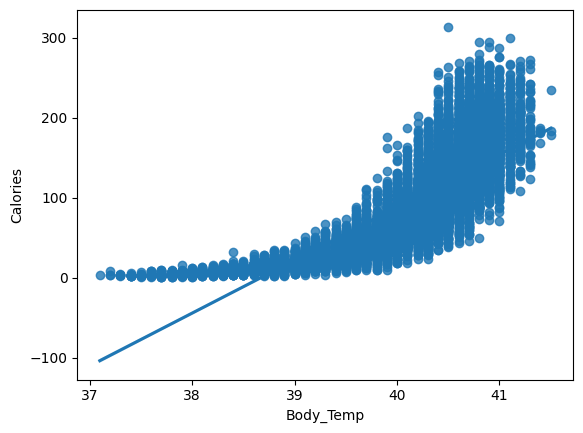

In [19]:
sns.regplot(x=data['Body_Temp'], y=data['Calories'])
plt.show()

In [20]:
import matplotlib.pyplot as plt

def plot_pie(data, category_column):
    """
    Plot a pie chart for the specified categorical column.

    Parameters:
    - data: Pandas DataFrame containing the dataset.
    - category_column: Name of the categorical column to plot.

    Returns:
    - None: Displays the pie chart.
    """
    # Count the occurrences of each category and plot the pie chart
    data[category_column].value_counts().plot.pie(
        autopct='%1.1f%%',  # Format for percentage display
        figsize=(5, 5),     # Set figure size
        startangle=90       # Start the pie chart at the top
    )
    plt.title(f'Pie Chart of {category_column}')  # Title of the chart
    plt.ylabel('')  # Hide the y-label
    plt.show()  # Display the plot


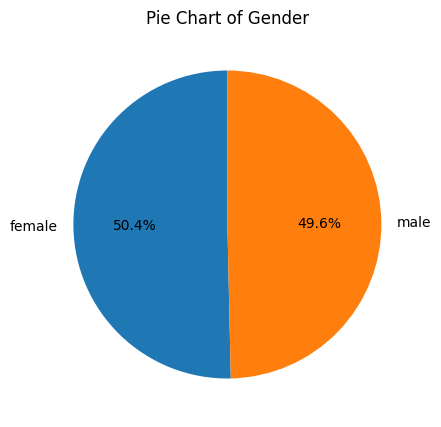

In [21]:
# Call the function with the 'Gender' column
plot_pie(data, 'Gender')

In [22]:
def plot_line(data, x_column, y_column):
    plt.figure(figsize=(10, 5))
    plt.plot(data[x_column], data[y_column])
    plt.title('Line Plot of Values Over Time')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()

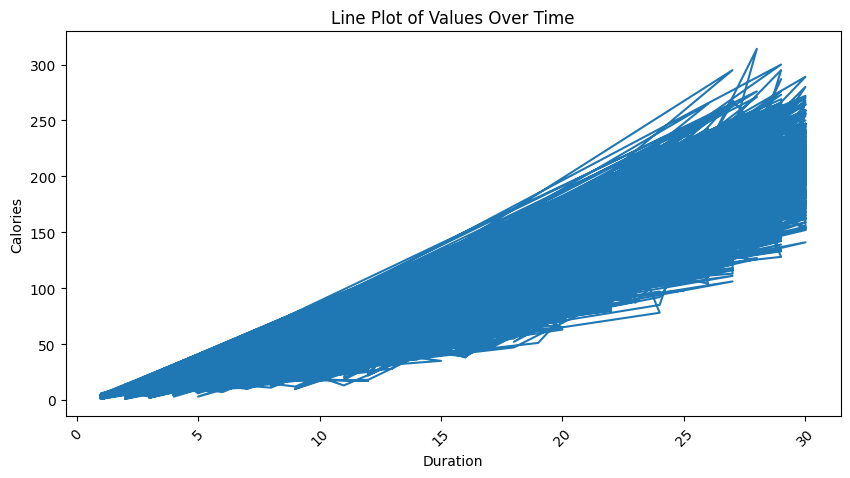

In [23]:
plot_line(data, 'Duration', 'Calories')

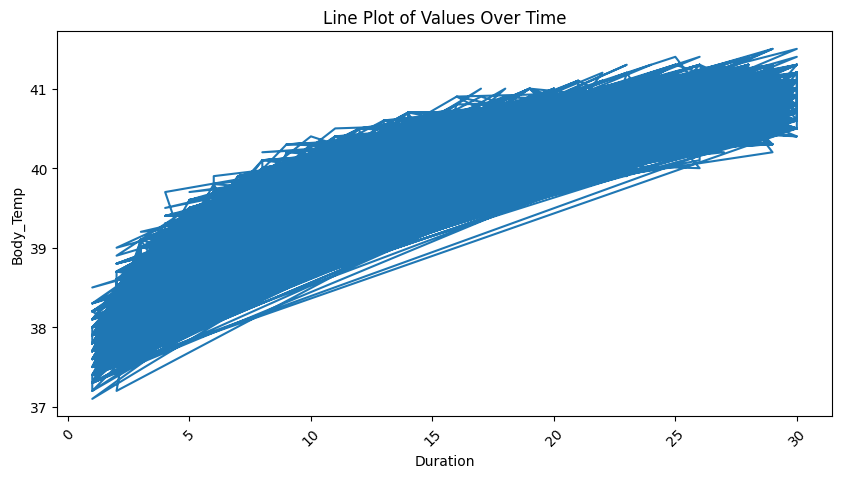

In [24]:
plot_line(data, 'Duration', 'Body_Temp')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_facet_grid(data, categorical_column, numerical_column):
    """
    Create a facet grid of histograms for a numerical column, divided by a categorical column.

    Parameters:
    - data: Pandas DataFrame containing the dataset.
    - categorical_column: Column name for the categorical variable (e.g., 'Gender').
    - numerical_column: Column name for the numerical variable to be plotted (e.g., 'Calories').

    Returns:
    - None: Displays the facet grid.
    """
    g = sns.FacetGrid(data, col=categorical_column)  # Create a FacetGrid based on the categorical column
    g.map(sns.histplot, numerical_column)  # Map the histogram for the numerical column
    g.add_legend()  # Add a legend to the facet grid
    plt.show()  # Display the plot

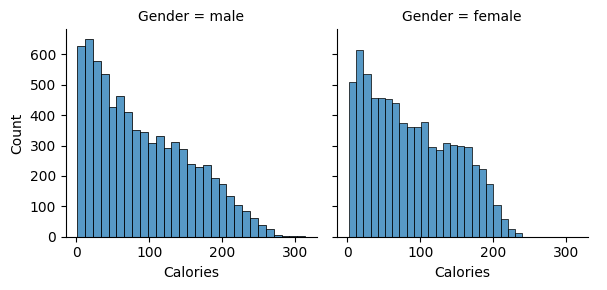

In [26]:
plot_facet_grid(data, 'Gender', 'Calories')

In [27]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [28]:
X,y = seperate_features_target(data,'Calories')

In [29]:
X = X.drop(columns=['User_ID'])

In [30]:
X_train,X_test,y_train,y_test = perform_train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
data.shape

(15000, 9)

In [32]:
X_train.shape

(12000, 7)

In [33]:
X_test.shape

(3000, 7)

In [34]:
X_train

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
9839     male   37   179.0    77.0       7.0        81.0       39.5
9680     male   23   195.0    87.0      26.0       110.0       40.5
7093     male   33   181.0    77.0      12.0        88.0       40.1
11293  female   66   156.0    54.0       9.0        77.0       39.5
820    female   32   144.0    49.0       5.0        90.0       39.0
...       ...  ...     ...     ...       ...         ...        ...
5191   female   75   148.0    51.0      22.0       104.0       40.6
13418  female   21   172.0    67.0      20.0       104.0       40.7
5390     male   57   189.0    92.0       8.0        90.0       39.5
860      male   35   174.0    76.0      12.0        97.0       40.2
7270     male   26   182.0    86.0      16.0        91.0       40.5

[12000 rows x 7 columns]

In [35]:
X_test

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
11499  female   45   154.0    52.0      26.0       107.0       40.6
6475     male   21   187.0    90.0      29.0       111.0       40.5
13167    male   58   176.0    77.0      11.0        90.0       40.0
862      male   35   182.0    89.0      24.0       108.0       40.8
5970   female   67   171.0    67.0      29.0       116.0       41.1
...       ...  ...     ...     ...       ...         ...        ...
6216   female   61   166.0    66.0      28.0       106.0       41.0
3585   female   73   165.0    66.0      10.0        92.0       40.0
10023  female   38   169.0    66.0      20.0       104.0       40.2
14044  female   25   163.0    54.0       5.0        86.0       39.2
12965    male   26   181.0    84.0      29.0       116.0       41.2

[3000 rows x 7 columns]

### Column Transformer and Pipeline

In [36]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
],remainder='passthrough')

In [37]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())
                    ])

In [38]:
from sklearn import set_config

In [39]:
set_config(display='diagram')

In [40]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [42]:
y_pred = pipeline.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.9672937151257295

In [45]:
from sklearn.model_selection import KFold

In [46]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')

In [49]:
cv_results.mean()

0.9671402283675841

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
mean_absolute_error(y_test,y_pred)

8.441513553849706

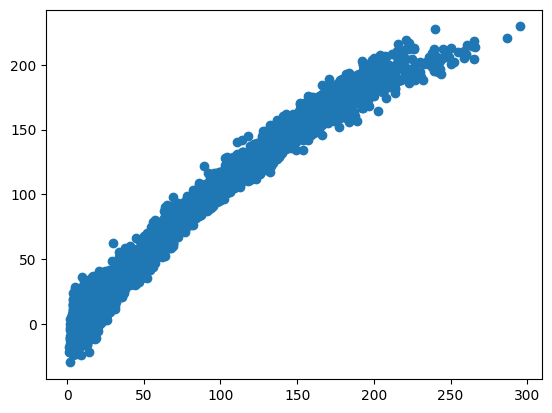

In [52]:
plt.scatter(y_test,y_pred)

In [53]:
residuals = y_test - y_pred
print(residuals)

11499     2.323540
6475     -3.088578
13167    -3.147964
862       5.523585
5970     13.549333
           ...    
6216      0.838791
3585     -8.115451
10023    -9.665701
14044    17.584722
12965    22.009183
Name: Calories, Length: 3000, dtype: float64


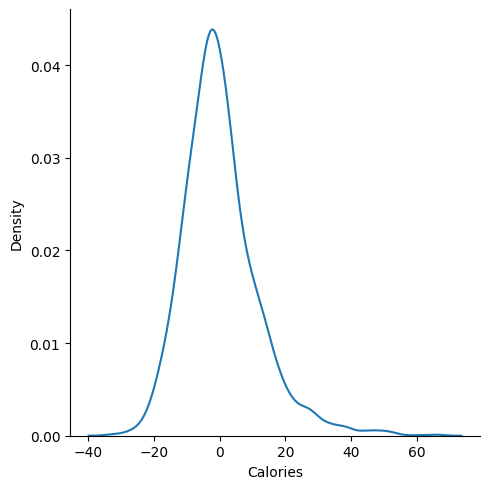

In [54]:
#plot the residuals
sns.displot(residuals, kind = 'kde')   #providing with normal distribution graph 

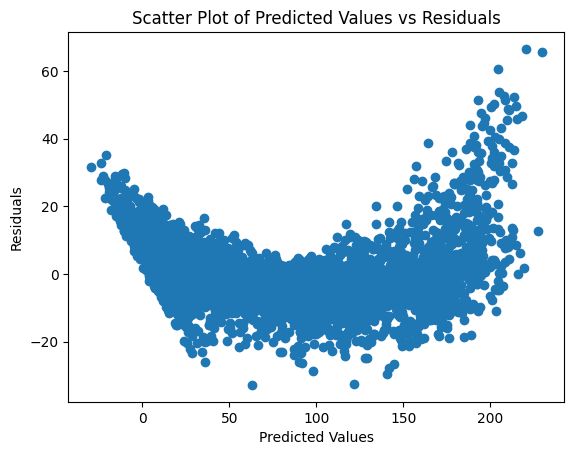

In [55]:
# Assuming y_pred and residuals are defined
plt.scatter(y_pred, residuals)          # pred values vs errors graph

# Add labels
plt.xlabel("Predicted Values")          
plt.ylabel("Residuals")                 
plt.title("Scatter Plot of Predicted Values vs Residuals")  

# Display the plot
plt.show()

In [56]:
def model_scorer(model_name,model):
    
    output=[]
   
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())
    
    return output

In [57]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}

In [58]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [59]:
model_output

[['log', 0.9672937151257295, 8.441513553849706, 0.9671402283675841],
 ['RF', 0.9982840389865957, 1.67339, 0.9978878383305035],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

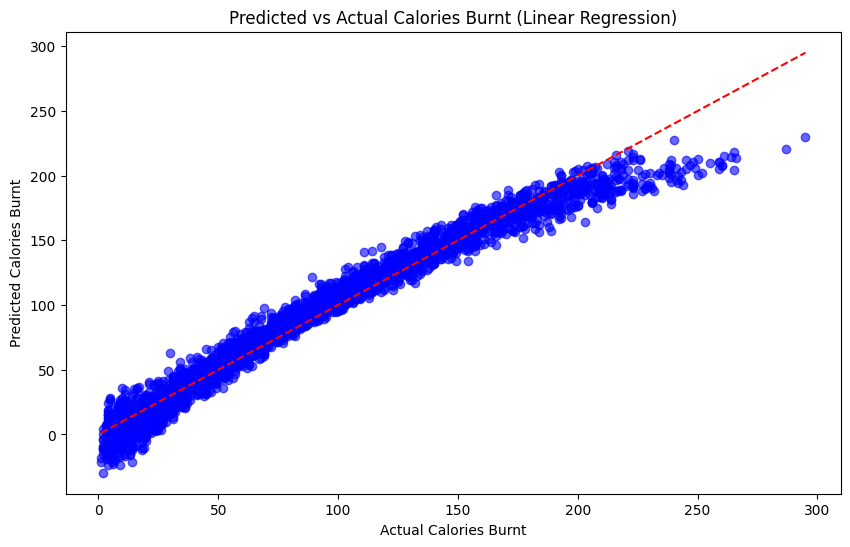

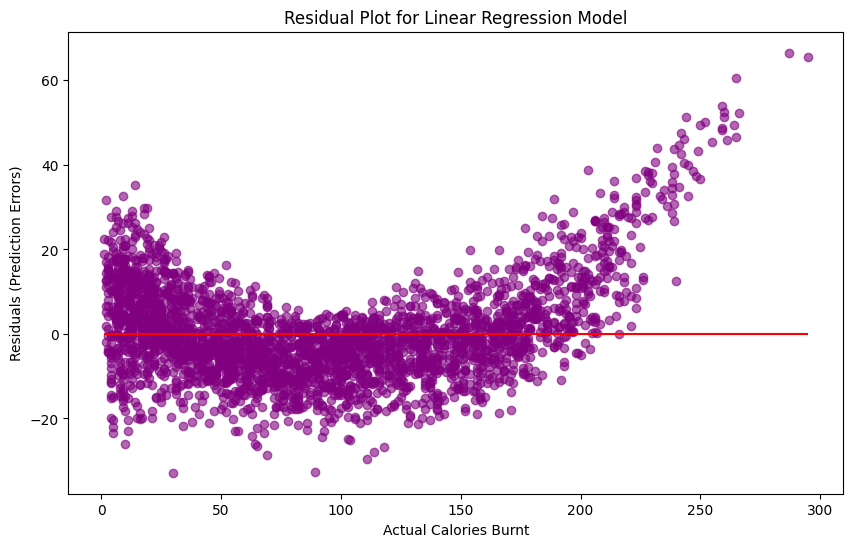

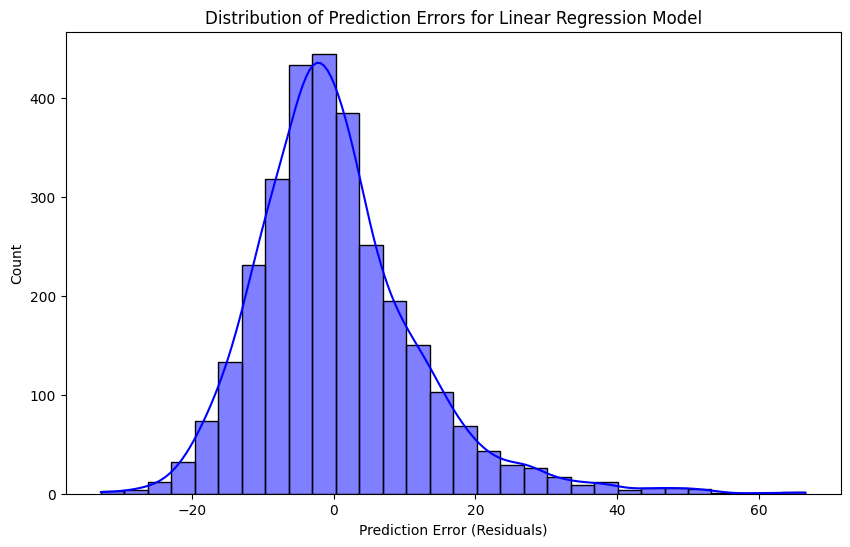

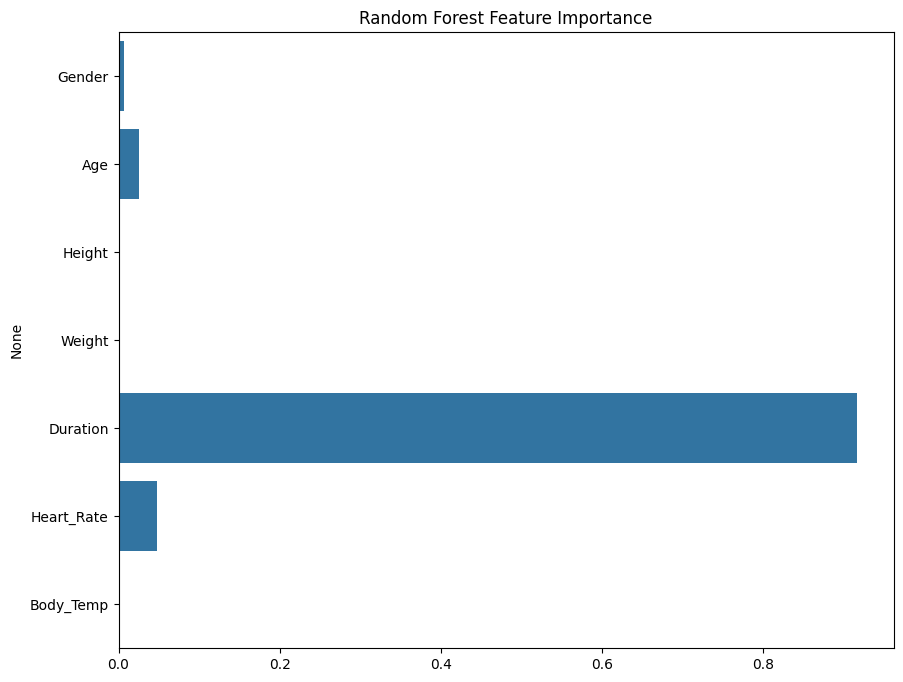

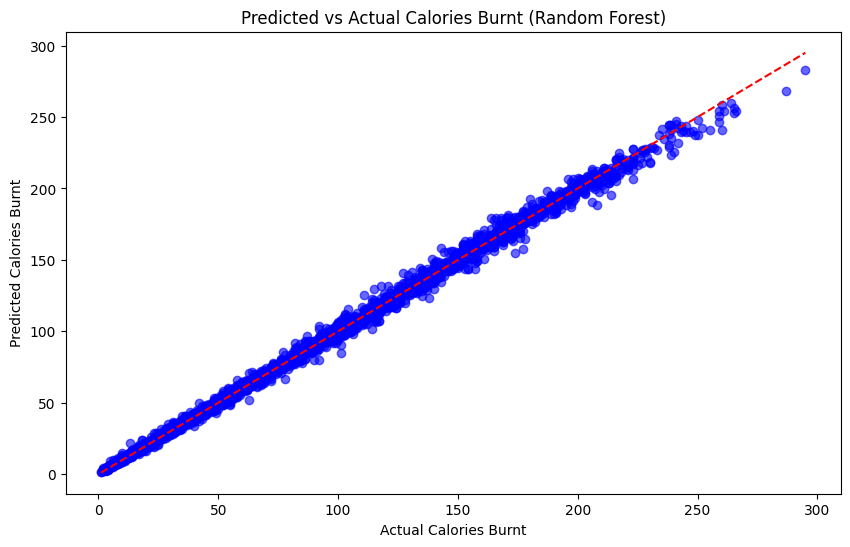

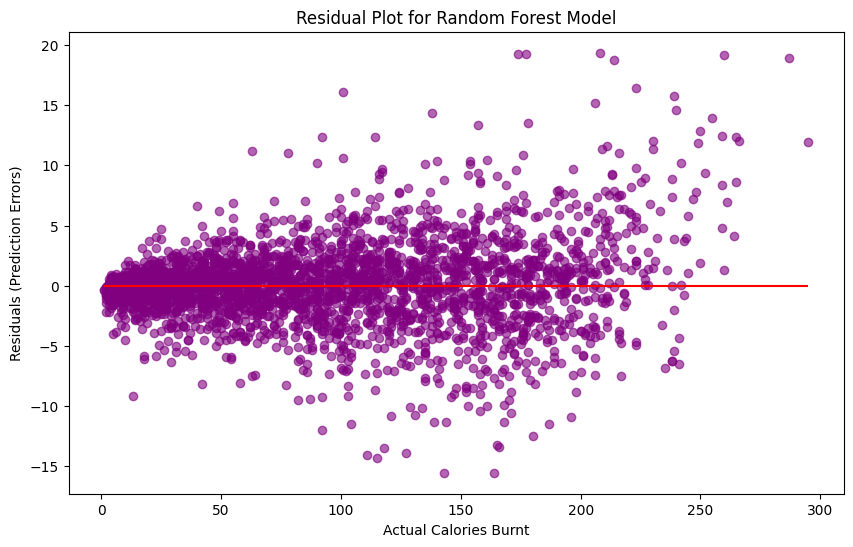

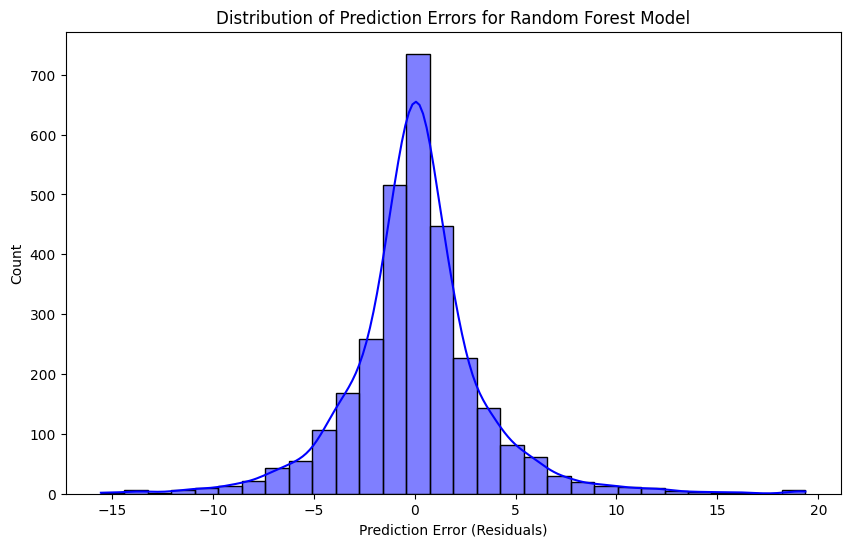

<Figure size 1000x800 with 0 Axes>

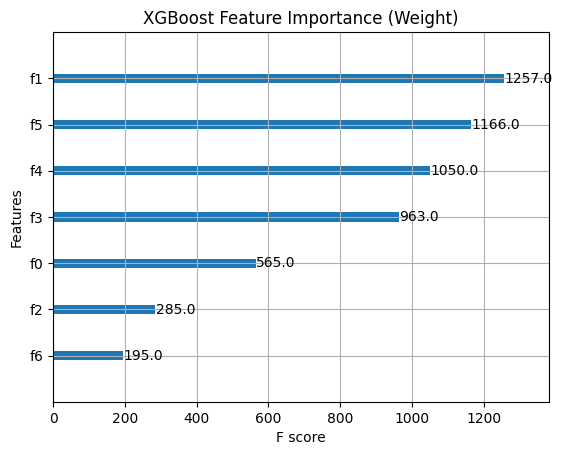

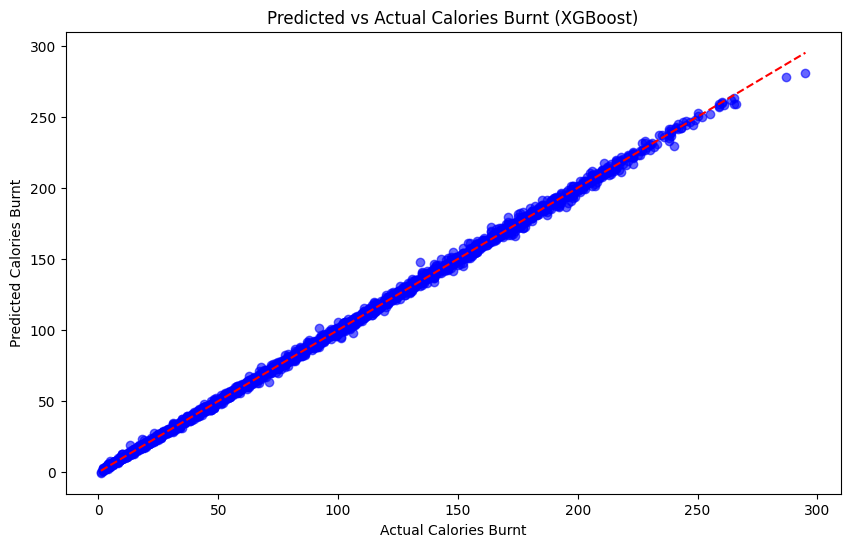

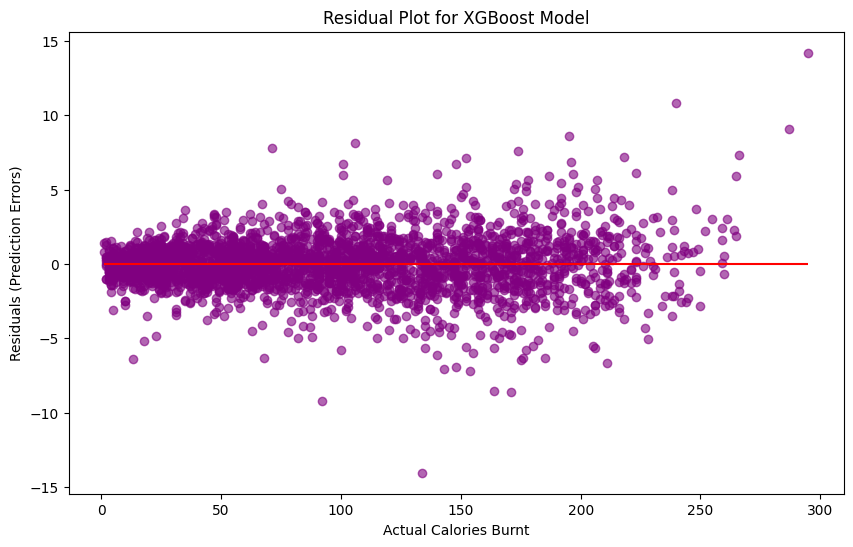

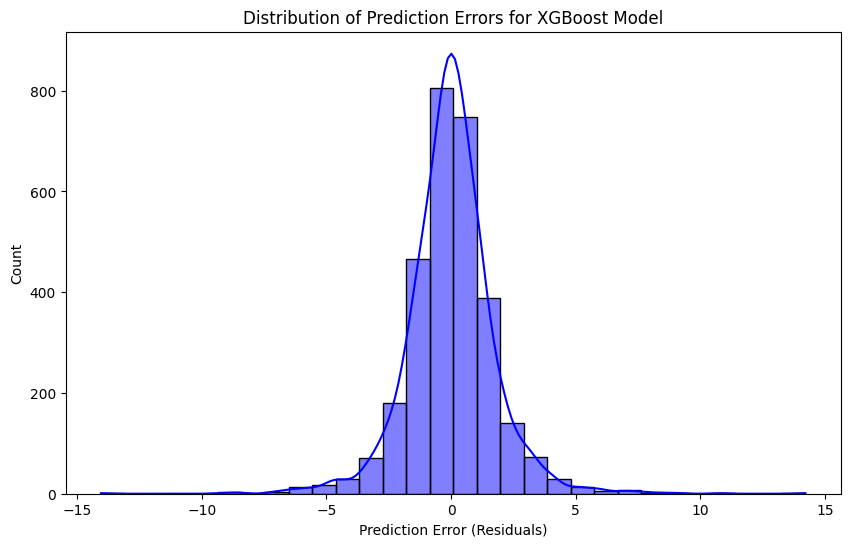

Model                   Linear Regression Random Forest XGBoost Regressor
R² Score                         0.967294      0.997134           0.99924
Mean Squared Error             131.995746     11.565649          3.067236
Mean Absolute Error              8.441514      2.283366          1.224158
Root Mean Squared Error          11.48894      3.400831          1.751353
Explained Variance                0.96732      0.997136           0.99924
n_estimators                          N/A           100               100
max_depth                             N/A            10                 6
learning_rate                         N/A           N/A               0.1


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Initialize model dictionary
model_dict = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
}

# List to store model metrics and hyperparameters
model_results = []

# Train and evaluate each model
for model_name, model in model_dict.items():
    # Create pipeline for the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    explained_var = explained_variance_score(y_test, y_pred)
    
    # Retrieve model hyperparameters
    params = model.get_params()
    n_estimators = params.get('n_estimators', 'N/A')
    max_depth = params.get('max_depth', 'N/A')
    learning_rate = params.get('learning_rate', 'N/A') if model_name == 'XGBoost Regressor' else 'N/A'
    
    # Append results for the current model
    model_results.append([
        model_name, r2, mse, mae, rmse, explained_var, 
        n_estimators, max_depth, learning_rate
    ])

    # Plot diagrams only for XGBoost model
    if model_name == 'XGBoost Regressor':
        # Feature Importance Plot
        plt.figure(figsize=(10, 8))
        plot_importance(model, importance_type='weight')
        plt.title("XGBoost Feature Importance (Weight)")
        plt.show()

        # Predicted vs Actual Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
        plt.xlabel("Actual Calories Burnt")
        plt.ylabel("Predicted Calories Burnt")
        plt.title("Predicted vs Actual Calories Burnt (XGBoost)")
        plt.show()

        # Residual Plot for XGBoost Model
        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, residuals, alpha=0.6, color='purple')
        plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
        plt.xlabel("Actual Calories Burnt")
        plt.ylabel("Residuals (Prediction Errors)")
        plt.title("Residual Plot for XGBoost Model")
        plt.show()

        # Error Distribution (Residuals) Plot
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, color="blue", bins=30)
        plt.xlabel("Prediction Error (Residuals)")
        plt.title("Distribution of Prediction Errors for XGBoost Model")
        plt.show()

###############################
        # Plot diagrams for Random Forest model
    if model_name == 'Random Forest':
        # Feature Importance Plot for Random Forest
        plt.figure(figsize=(10, 8))
        feature_importances = model.feature_importances_
        sns.barplot(x=feature_importances, y=X_train.columns)
        plt.title("Random Forest Feature Importance")
        plt.show()

        # Predicted vs Actual Plot for Random Forest
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
        plt.xlabel("Actual Calories Burnt")
        plt.ylabel("Predicted Calories Burnt")
        plt.title("Predicted vs Actual Calories Burnt (Random Forest)")
        plt.show()

        # Residual Plot for Random Forest Model
        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, residuals, alpha=0.6, color='purple')
        plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
        plt.xlabel("Actual Calories Burnt")
        plt.ylabel("Residuals (Prediction Errors)")
        plt.title("Residual Plot for Random Forest Model")
        plt.show()

        # Error Distribution (Residuals) Plot for Random Forest
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, color="blue", bins=30)
        plt.xlabel("Prediction Error (Residuals)")
        plt.title("Distribution of Prediction Errors for Random Forest Model")
        plt.show()

###############################

    if model_name == 'Linear Regression':
        # Predicted vs Actual Plot for Linear Regression
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
        plt.xlabel("Actual Calories Burnt")
        plt.ylabel("Predicted Calories Burnt")
        plt.title("Predicted vs Actual Calories Burnt (Linear Regression)")
        plt.show()

        # Residual Plot for Linear Regression Model
        residuals = y_test - y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, residuals, alpha=0.6, color='purple')
        plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
        plt.xlabel("Actual Calories Burnt")
        plt.ylabel("Residuals (Prediction Errors)")
        plt.title("Residual Plot for Linear Regression Model")
        plt.show()

        # Error Distribution (Residuals) Plot for Linear Regression
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, color="blue", bins=30)
        plt.xlabel("Prediction Error (Residuals)")
        plt.title("Distribution of Prediction Errors for Linear Regression Model")
        plt.show()

# Convert results to DataFrame for summary
model_summary_df = pd.DataFrame(model_results, columns=[
    'Model', 'R² Score', 'Mean Squared Error', 'Mean Absolute Error', 
    'Root Mean Squared Error', 'Explained Variance', 
    'n_estimators', 'max_depth', 'learning_rate'
])

# Transpose for horizontal view
model_summary_transposed = model_summary_df.set_index('Model').transpose()

# Display the transposed summary
print(model_summary_transposed)


In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
    
],remainder='passthrough')

In [62]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())
    
])

In [63]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [64]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [65]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

### Save The Model

In [66]:
import pickle

In [67]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [68]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [69]:
result = pipeline_saved.predict(sample)

In [70]:
result 

array([231.0721], dtype=float32)

In [71]:
# Access the model from the pipeline
model = pipeline_saved.named_steps['model']

# Display feature importances (if your model is trained)
print(model.feature_importances_)


[2.5274634e-02 2.4695961e-02 3.1510959e-04 5.9374850e-03 8.9314610e-01
 5.0477862e-02 1.5289329e-04]


In [72]:
from sklearn.metrics import mean_squared_error, r2_score
# Assuming you have y_test (true values) and y_pred (predicted values)
y_pred = pipeline_saved.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.6795127497059894
R-squared Score: 0.9995838455085851


In [73]:
# Access the preprocessor from the pipeline
preprocessor = pipeline_saved.named_steps['preprocessor']

# Get the transformers applied
print(preprocessor.transformers)


[('ordinal', OrdinalEncoder(), ['Gender']), ('num', StandardScaler(), ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])]


In [74]:
print(pipeline_saved)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                   

### GUI

In [ ]:
import pickle
import pandas as pd
from tkinter import *
from tkinter import ttk, messagebox
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Data
def load_data():
    try:
        calories = pd.read_csv('calories.csv')
        exercise = pd.read_csv('exercise.csv')
        return pd.merge(calories, exercise, on='User_ID')
    except FileNotFoundError:
        messagebox.showerror("File Error", "Required CSV files not found.")
        return None

data = load_data()

# Function to validate inputs
def validate_inputs():
    try:
        gender = clicked.get().strip().lower()
        if gender not in ['male', 'female']:
            raise ValueError("Gender must be 'male' or 'female'")
        
        age = float(e2.get())
        height = float(e3.get())
        weight = float(e4.get())
        duration = float(e5.get())
        heart_rate = float(e6.get())
        body_temp = float(e7.get())
        
        return gender, age, height, weight, duration, heart_rate, body_temp
    except ValueError as e:
        messagebox.showerror("Input Error", str(e))
        return None

# Function to get actual gender from the dropdown
def get_gender_from_dropdown():
    selected = clicked.get()
    if selected == "male":
        return "male"
    elif selected == "female":
        return "female"
    else:
        return None  # Default case (though you shouldn't get this)

# Predict Calories Burnt
def show_entry():
    inputs = validate_inputs()
    if inputs is None:
        return
    
    gender, age, height, weight, duration, heart_rate, body_temp = inputs
    
    try:
        # Get gender value from dropdown
        gender = get_gender_from_dropdown()
        if gender is None:
            messagebox.showerror("Input Error", "Please select a valid gender.")
            return
        
        with open('pipeline.pkl', 'rb') as f:
            pipeline = pickle.load(f)
        
        sample = pd.DataFrame({
            'Gender': [gender],
            'Age': [age],
            'Height': [height],
            'Weight': [weight],
            'Duration': [duration],
            'Heart_Rate': [heart_rate],
            'Body_Temp': [body_temp],
        })
        
        result = pipeline.predict(sample)
        result_label.config(text=f"{result[0]:.2f} cal 💪")
        progress['value'] = min(result[0] / 10, 100)
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred during prediction: {str(e)}")

# Personal Goal Tracker
def open_goal_tracker():
    goal_window = Toplevel(master)
    goal_window.title("Personal Goal Tracker 🎯")
    goal_window.geometry("400x600")
    goal_window.configure(bg="#e0f7fa")

    # Aesthetic Header for Goal Tracker
    header_frame = Frame(goal_window, bg="#00796b")
    header_frame.pack(fill=X)

    header_label = Label(header_frame, text="Personal Goal Tracker 🎯", font=('Helvetica', 16, 'bold'), fg="#ffffff", bg="#00796b", pady=10)
    header_label.pack()

    # Input fields for goal tracker
    ttk.Label(goal_window, text="📅 Age:", font=('Helvetica', 12, 'bold'), background="#e0f7fa").pack(pady=5)
    age_entry = ttk.Entry(goal_window, font=('Helvetica', 12), width=30)
    age_entry.pack(pady=8)

    ttk.Label(goal_window, text="📏 Height (cm):", font=('Helvetica', 12, 'bold'), background="#e0f7fa").pack(pady=5)
    height_entry = ttk.Entry(goal_window, font=('Helvetica', 12), width=30)
    height_entry.pack(pady=8)

    ttk.Label(goal_window, text="⚖ Weight (kg):", font=('Helvetica', 12, 'bold'), background="#e0f7fa").pack(pady=5)
    weight_entry = ttk.Entry(goal_window, font=('Helvetica', 12), width=30)
    weight_entry.pack(pady=8)

    ttk.Label(goal_window, text="🔥 Target Calories to Burn:", font=('Helvetica', 12, 'bold'), background="#e0f7fa").pack(pady=5)
    target_calories_entry = ttk.Entry(goal_window, font=('Helvetica', 12), width=30)
    target_calories_entry.pack(pady=8)

    gender_var = StringVar(value='Select Gender')
    ttk.Label(goal_window, text="Select Gender:", font=('Helvetica', 12, 'bold'), background="#e0f7fa").pack(pady=5)
    gender_dropdown = ttk.Combobox(goal_window, textvariable=gender_var, values=['male', 'female'], state="readonly", width=28)
    gender_dropdown.pack(pady=8)

    # Recommendation label with consistent color
    recommendation_label = ttk.Label(goal_window, text="", font=('Helvetica', 12), wraplength=300, background="#e0f7fa")
    recommendation_label.pack(pady=15)

    # Function to recommend a plan
    def recommend_plan():
        try:
            target_calories = float(target_calories_entry.get())
            if target_calories < 100:
                recommendation_label.config(text="⚠ Target too low. Set a realistic goal!", foreground="red")
                return

            exercise_plan = (
                "💪 Exercise Plan:\n"
                "- 45 min cardio\n"
                "- 20 min strength training\n"
                "- 15 min stretching"
            )
            diet_plan = (
                "🥗 Diet Plan:\n"
                "- High-protein meals\n"
                "- Stay hydrated"
            )
            recommendation_label.config(text=f"{exercise_plan}\n\n{diet_plan}", foreground="green")
        except Exception as e:
            messagebox.showerror("Input Error", f"Invalid input: {str(e)}")

    # Button for setting the goal
    ttk.Button(goal_window, text="Set Goal 🎯", command=recommend_plan, width=25).pack(pady=15)

    # Aesthetic Footer for Goal Tracker
    footer_label = Label(goal_window, text="Developed by Pranchal & Team", font=('Helvetica', 10), fg="#555555", bg="#e0f7fa", pady=10)
    footer_label.pack(side=BOTTOM)

# Create main window
master = Tk()
master.title("Enhanced Calorie Burnt Predictor")
master.geometry("500x800")
master.config(bg="#e0f7fa")

# Enhanced Header
header_frame = Frame(master, bg="#00796b")
header_frame.pack(fill=X)

header_label = Label(header_frame, text="Enhanced Calorie Burnt Predictor", font=('Helvetica', 16, 'bold'), fg="#ffffff", bg="#00796b", pady=10)
header_label.pack()

# Input fields
input_fields = [
    ("📅 Age:", 'e2'),
    ("📏 Height (cm):", 'e3'),
    ("⚖ Weight (kg):", 'e4'),
    ("⏳ Duration (min):", 'e5'),
    ("❤ Heart Rate (bpm):", 'e6'),
    ("🌡 Body Temp (°C):", 'e7')
]

for label_text, entry_var in input_fields:
    ttk.Label(master, text=label_text, font=('Helvetica', 12, 'bold')).pack(pady=5)
    globals()[entry_var] = ttk.Entry(master, font=('Helvetica', 12), width=30)
    globals()[entry_var].pack(pady=5)

# Gender Dropdown
clicked = StringVar(value="Select Gender")
ttk.Combobox(master, textvariable=clicked, values=["male", "female"], state="readonly", width=28).pack(pady=10)

# Buttons
ttk.Button(master, text="Predict 🔮", command=show_entry).pack(pady=15)
result_label = ttk.Label(master, text="", font=('Helvetica', 14), foreground="#009688")
result_label.pack(pady=10)

progress = ttk.Progressbar(master, length=400, mode="determinate")
progress.pack(pady=15)

ttk.Button(master, text="Goal Tracker 🎯", command=open_goal_tracker).pack(pady=20)

# Footer
footer_label = Label(master, text="Developed by Pranchal & Team", font=('Helvetica', 10), fg="#555555", bg="#e0f7fa", pady=10)
footer_label.pack(side=BOTTOM)

master.mainloop()
